# Vivo Horvath

# Setup

Activate `npx_10m_384ch_unit_classes` venv

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import spikeinterface.extractors as se 
import os
import spikeinterface as si
import spikeinterface.preprocessing as spre
import spikeinterface.widgets as sw

# SET PROJECT PATH
# PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/"

os.chdir(PROJ_PATH)

# set channel
CHANNEL_ID = 50

# SETUP REAL REYES EXPERIMENT
# file 05 is for spontaneous activity
# DATA_PATH = "/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/horvath/Rat01/Insertion1/Depth1/Rat01_Insertion1_Depth1.nwb"
DATA_PATH = "/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/horvath/Rat01/Insertion1/Depth2/Rat01_Insertion1_Depth2.nwb"

# Check raw lfp traces

Describe data

In [2]:
# load
# reyes_recording = se.read_mcsraw(DATA_PATH)
reyes_recording = se.NwbRecordingExtractor(DATA_PATH)

# preprocess (sampling frequency is 20,000 Hz)
reyes_recording_pre = spre.bandpass_filter(reyes_recording, freq_min=300, freq_max=3000)

# reyes_recording_pre = si.preprocessing.whiten(reyes_recording_pre)

trace = spre.common_reference(reyes_recording_pre, reference='global', operator='median')

In [3]:
reyes_recording

NwbRecordingExtractor: 128 channels - 1 segments - 20.0kHz - 3688.668s
  file_path: /gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/horvath/Rat01/Insertion1/Depth2/Rat01_Insertion1_Depth2.nwb

In [4]:
# inspect object
print(f"\ntrace type: \n {type(trace)}\n")
print(f"trace attributes: \n")
print(dir(trace))

# inspect the raw lfp recording
duration = trace.get_total_duration()
print(f"trace recording duration: {duration} secs\n")


trace type: 
 <class 'spikeinterface.preprocessing.common_reference.CommonReferenceRecording'>

trace attributes: 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_channel_slice', '_check_segment_index', '_dtype', '_extra_metadata_from_folder', '_extra_metadata_to_folder', '_features', '_frame_slice', '_get_file_path', '_kwargs', '_main_annotations', '_main_features', '_main_ids', '_main_properties', '_parent_recording', '_preferred_mp_context', '_properties', '_recording_segments', '_remove_channels', '_sampling_frequency', '_save', '_select_segments', 'add_recording_segment', 'annotate', 'binary_compatible_with', 'channel_ids', 'channel_slice', 'check_if_dumpable', 'clear_c

Check realism

In [5]:
# 20 min
traces = trace.get_traces()

In [6]:
traces.shape

(73773360, 128)

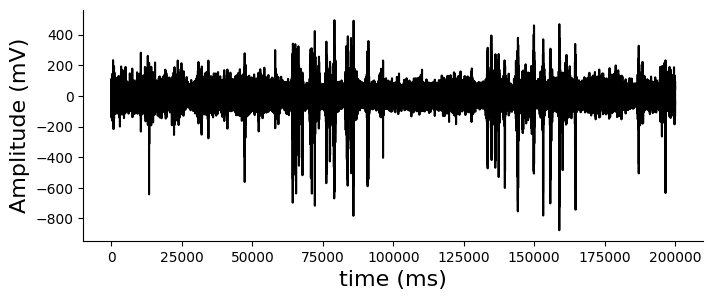

In [25]:
# Show example of the traces recorded from channel 10
fig = plt.figure(figsize=(8,3));
DURATION = 1.01
CHANNEL_ID = 10

ax3 = fig.add_subplot(1,1,1);
plt.plot(traces[430000 : 630000, CHANNEL_ID], "k")
ax3.set_xlabel("time (ms)", fontsize=16);
ax3.set_ylabel("Amplitude (mV)", fontsize=16);
ax3.spines[['right','top']].set_visible(False)

# SAVE FIGURE
plt.savefig("figures/2_realism/1_components/pdf/vivo_horvath_single_channel_lfp.pdf")
plt.savefig("figures/2_realism/1_components/svg/vivo_horvath_single_channel_lfp.svg")

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 